# Linear algebra operations

For linear algebra, we are going to use the module numpy.

In [1]:
import numpy as np

### Creating vectors

In [13]:
u = np.asarray([1, 1])
v = np.asarray([5, 4, 3, 2, 1])

print("u:", u)
print("v:", v)

u: [1 1]
v: [5 4 3 2 1]


In [18]:
u = np.zeros(2)
print("u:", u)

v = np.ones(2)
print("v:", v)
print("v*2:", v)

v = np.ones(4)*np.pi
print("v:", v)
print("v*2:", v)

u: [0. 0.]
v: [1. 1.]
v*2: [1. 1.]
v: [3.14159265 3.14159265 3.14159265 3.14159265]
v*2: [3.14159265 3.14159265 3.14159265 3.14159265]


Note that these vectors u and v are [shape]...

In [19]:
print("u.shape:", u.shape)
print("u.dtype:", u.dtype)
print("v.shape:", v.shape)
print("v.dtype:", v.dtype)

u.shape: (2,)
u.dtype: float64
v.shape: (4,)
v.dtype: float64


## Slices and indexing

...

In [22]:
v = np.asarray([5, 4, 3, 2, 1])

print("v:", v)
print("v[0]:", v[0])
print("v[:3]:", v[:3])
print("v[3:]:", v[3:])

v: [5 4 3 2 1]
v[0]: 5
v[:3]: [5 4 3]
v[3:]: [2 1]


# Distance

In [24]:
u = np.zeros(3)
v = np.asarray([1, 1, 1])

print("u:", u)
print("v:", v)

print("||u-v||:", np.linalg.norm(u-v))
print("np.sqrt(1**2+1**2+1**2)", np.sqrt(1**2+1**2+1**2))

u: [0. 0. 0.]
v: [1 1 1]
||u-v||: 1.7320508075688772
np.sqrt(1**2+1**2+1**2) 1.7320508075688772


Middle point between vectors

In [26]:
u = np.asarray([0, 1, 1])
v = np.asarray([2, 2, 1])
print((u+v)/2)

[1.  1.5 1. ]


# Matrix operations

In [28]:
A = np.zeros((3, 3))
print("A:", A)

B = np.eye(3)
print("B:", B)

C = np.asarray([[10, 2, 1], [2, 10, 1], [2, 2, 10]])
print("C:", C)

A: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
B: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
C: [[10  2  1]
 [ 2 10  1]
 [ 2  2 10]]


Matrix multiplication

In [ ]:
def mul(M, N):
    result = np.zeros((N.shape[], N.shape[]))
    assert M.shape[] == N.shape[], "..."
    for i in range():
        for j in range():            
            for k in range():
                result[] += M[]*N[]
    return result

np.matmul(A, B)

Multiple dot products

Projection

# Classfication

Linear algebra is often used for classfying ...

Loading some data and showing it

In [5]:
from sklearn.datasets import fetch_openml
# https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = np.asarray([int(s) for s in y], dtype=np.int)

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), interpolation='nearest', cmap='gray')
    plt.xlabel('Item %i, Class %i' % (i, y[i]))

The data is split up into a training set and a test set

In [7]:
X_train = X[:60000, :]
y_train = y[:60000]
X_test = X[60000:, :]
y_test = y[60000:]

number0 = 3
number1 = 2
X_train = X_train[np.any([y_train==number0, y_train==number1], axis=0), :]
y_train = y_train[np.any([y_train==number0, y_train==number1], axis=0)]
X_test = X_test[np.any([y_test==number0, y_test==number1], axis=0), :]
y_test = y_test[np.any([y_test==number0, y_test==number1], axis=0)]

Your classifier here

In [8]:
mu_0 = np.average(X_train[y_train==number0, :], axis=0)
mu_1 = np.average(X_train[y_train==number1, :], axis=0)
p = (mu_0 + mu_1) / 2
assert len(p)==784
n = p - mu_1
n = n / np.linalg.norm(n)

In [9]:
labels = list()
for i in range(X_test.shape[0]):
    v = X_test[i, :]
    d = np.dot(v - p, n)
    if d > 0:
        labels.append(number0)
    else:
        labels.append(number1)

In [10]:
print("Classification accuracy for numbers %i and %i: %.1f%%"
      % (number0, number1, 100*np.sum(labels==y_test)/len(labels)))

Classification accuracy for numbers 3 and 2: 93.2%


Error analysis

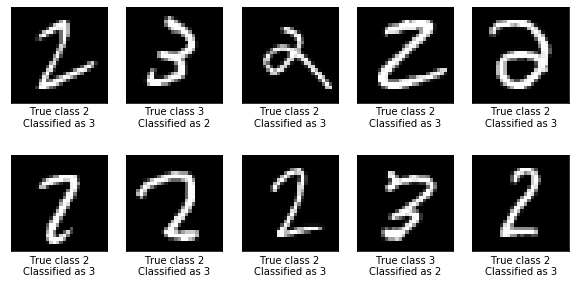

In [11]:
plt.figure(figsize=(10, 5))
errors = np.nonzero(labels != y_test)[0]
for i, index in enumerate(errors[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index, :].reshape(28, 28), interpolation='nearest', cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('True class %i\nClassified as %i'
               % (y_test[index], labels[index]))